# Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. 

## Building Decision Tree Model

Here, we are building a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, I'm using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
#importing data
df = pd.read_csv("GermanCredit.csv")

Exploring the data:

In [3]:
#getting its shape
df.shape

(1000, 62)

In [4]:
#peeping into it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [5]:
#statistics about the data
df.describe()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.596000,0.963000,0.274000,...,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.446232,...,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


Dividing the data into input and output vectors:

In [6]:
X = df.drop("Class", 1)

In [7]:
y = df["Class"]

In [8]:
X.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [9]:
y.head()

0    Good
1     Bad
2    Good
3    Good
4     Bad
Name: Class, dtype: object

Spliting the data for training and testing purposes:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Fitting a DecisionTree Classifier:

In [11]:
clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

Making predictions for the test data and getting accuracy score:

In [12]:
y_preds = clf1.predict(X_test)

In [13]:
score = accuracy_score(y_test, y_preds)
print(score)

0.6566666666666666


A detailed report- Classification Report:

In [14]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         Bad       0.40      0.49      0.44        83
        Good       0.79      0.72      0.75       217

    accuracy                           0.66       300
   macro avg       0.59      0.61      0.60       300
weighted avg       0.68      0.66      0.67       300



KFold Validation Cross-Validation:

In [15]:
def cv_score(clf, X, y, score_func=accuracy_score):
    scores = 0
    n_splits = 5
    for train_index, test_index in KFold(n_splits=n_splits, shuffle=False).split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = clf.fit(X_train, y_train)
        scores += score_func(y_test, model.predict(X_test))
    return scores/n_splits

In [16]:
depths = [1, 2, 5, 10, 20, 50]
max_score = 0
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    score = cv_score(clf, X, y)
    if score > max_score:
        max_score = score
        best_depth = depth
print(max_score)
print(best_depth)

0.7220000000000001
5


Fitting the model based on KFold cross validation:

In [17]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
score = accuracy_score(y_test, y_preds)
print(score)

0.7133333333333334


Grid Search for Hyper-Parameter Tuning:

In [18]:
from sklearn.model_selection import GridSearchCV
clf2 = DecisionTreeClassifier()
parameters = {"max_depth":[1,2,5,10,20],"min_samples_split":[2,5,10,20]}
fitmodel = GridSearchCV(clf2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(X_train, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_

(DecisionTreeClassifier(max_depth=5, min_samples_split=20),
 {'max_depth': 5, 'min_samples_split': 20},
 0.7128571428571429)

In [19]:
y_preds = fitmodel.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_preds)
print(score)

0.7033333333333334


In [20]:
y_preds[0:5]

array(['Good', 'Bad', 'Good', 'Good', 'Good'], dtype=object)

Plotting the Tree:

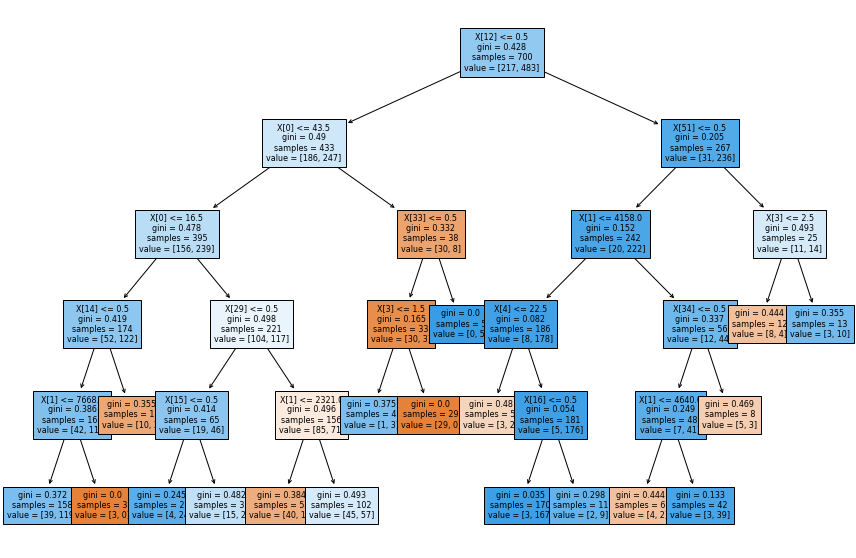

In [21]:
plt.figure(figsize=(15,10))
plot_tree(fitmodel.best_estimator_, filled=True, fontsize=8)
plt.show()

## Random Forests

Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good.

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this project, we are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. 

First, let's build a Random Forests model.

In [22]:
#imports
from sklearn.ensemble import RandomForestClassifier

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Fitting RamdomForestClassifer on the training set:

In [24]:
rf1 = RandomForestClassifier()
rf1.fit(X_train, y_train)

RandomForestClassifier()

Making predictions on the test set:

In [25]:
y_preds = rf1.predict(X_test)
score = accuracy_score(y_test, y_preds)
print(score)

0.7633333333333333


Applying KFold cross validation:

In [26]:
def cv_score(clf, X, y, score_func=accuracy_score):
    scores = 0
    n_splits = 5
    for train_index, test_index in KFold(n_splits=n_splits, shuffle=False).split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = clf.fit(X_train, y_train)
        scores += score_func(y_test, model.predict(X_test))
    return scores/n_splits

In [27]:
n_estimators = [50, 100, 150, 200]
max_score = 0
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n)
    score = cv_score(rf, X, y)
    if score > max_score:
        max_score = score
        best_n_estimators = n
print(max_score)
print(best_n_estimators)

0.7689999999999999
50


Fitting a new RandomForestClassifier based on the KFold cross validation:

In [28]:
rf2 = RandomForestClassifier(n_estimators = 50)
rf2.fit(X_train, y_train)
y_preds = rf2.predict(X_test)
score = accuracy_score(y_test, y_preds)
print(score)

0.7366666666666667


GridSearch for Hyper-Parameter tuning:

In [29]:
rf3 = RandomForestClassifier()
parameters = {"n_estimators":[50, 100, 150, 200], "max_depth":[5,10,20,30]}
fitmodel = GridSearchCV(rf3, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(X_train, y_train)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_

(RandomForestClassifier(max_depth=30),
 {'max_depth': 30, 'n_estimators': 100},
 0.7771428571428571)

In [30]:
y_preds = fitmodel.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_preds)
print(score)

0.7433333333333333


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows us to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 


Let's visualize the importance of features from your Random Forests model

In [31]:
rf2.feature_importances_

array([6.65576163e-02, 9.04603351e-02, 3.56417686e-02, 3.78518275e-02,
       8.05962690e-02, 1.94878180e-02, 9.92142320e-03, 1.67216352e-02,
       4.69126825e-03, 5.25413992e-02, 1.82630853e-02, 6.81413280e-03,
       4.29652928e-02, 1.43107629e-02, 1.38254293e-02, 1.65677476e-02,
       9.09343550e-03, 1.89246902e-02, 1.73452643e-02, 1.13744698e-02,
       1.17135982e-02, 1.20205023e-02, 6.35239729e-04, 4.39818706e-03,
       8.84731297e-03, 0.00000000e+00, 3.03030303e-05, 6.09944536e-03,
       2.68891064e-03, 2.26628804e-02, 8.19166973e-03, 5.10867574e-03,
       4.08087390e-03, 1.45392510e-02, 2.00143805e-02, 1.32679160e-02,
       1.01888554e-02, 1.18818512e-02, 1.04158185e-02, 5.06737629e-03,
       1.28963504e-02, 1.60823950e-02, 9.67903012e-03, 0.00000000e+00,
       1.04143607e-02, 8.95544116e-03, 9.34588751e-03, 1.50043141e-02,
       1.36443919e-02, 1.76382751e-02, 1.16192837e-02, 1.39036883e-02,
       6.55685415e-03, 1.83456022e-02, 1.32315699e-02, 1.76990365e-02,
      

In [32]:
print("Feature\t\tImportance")
for i in range(len(X.columns)):
    print(i+1,"\t",rf2.feature_importances_[i])

Feature		Importance
1 	 0.06655761627746265
2 	 0.09046033512180254
3 	 0.035641768566381876
4 	 0.0378518274609029
5 	 0.08059626903728995
6 	 0.01948781799048486
7 	 0.009921423202985386
8 	 0.016721635187544315
9 	 0.00469126824981272
10 	 0.05254139918066842
11 	 0.01826308531481264
12 	 0.006814132804677234
13 	 0.04296529277419038
14 	 0.014310762924985405
15 	 0.013825429319618518
16 	 0.016567747566846994
17 	 0.009093435500346716
18 	 0.01892469015541599
19 	 0.017345264312506298
20 	 0.01137446979200408
21 	 0.011713598239056761
22 	 0.012020502281643532
23 	 0.0006352397291852051
24 	 0.004398187060177339
25 	 0.00884731296956682
26 	 0.0
27 	 3.0303030303030316e-05
28 	 0.006099445363311846
29 	 0.0026889106437179683
30 	 0.02266288037437724
31 	 0.008191669733861635
32 	 0.0051086757424703404
33 	 0.004080873898772125
34 	 0.01453925099214396
35 	 0.02001438053940637
36 	 0.01326791598826767
37 	 0.010188855356320664
38 	 0.01188185118159035
39 	 0.010415818454097803
40 	 

Plotting the impurity-based feature importances of the forest:

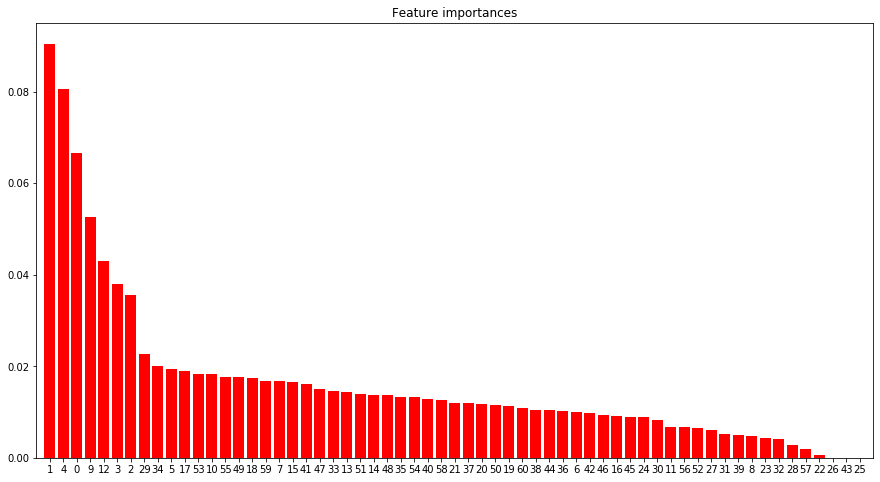

In [34]:
import numpy as np
importances = rf2.feature_importances_
indices = np.argsort(importances)[::-1]
std = np.std([importances for tree in rf2.estimators_],
             axis=0)
plt.figure(figsize=(15,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

There is another method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 


In [35]:
#imports
from sklearn.inspection import partial_dependence, plot_partial_dependence

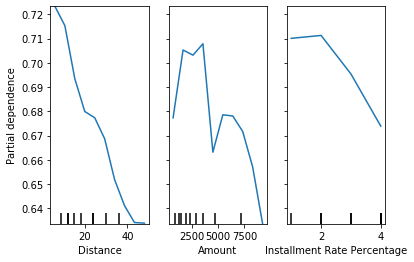

In [36]:
my_plots = plot_partial_dependence(rf2,       
                                   features=[0, 1, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['Distance', 'Amount', 'Installment Rate Percentage'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis